In [1]:
from konlpy.tag import Okt
okt = Okt()
# 형태소 토큰화

In [2]:
from konlpy.tag import Okt
okt=Okt()
token=okt.morphs('꿈의 거처')
token

['꿈', '의', '거처']

In [3]:
from konlpy.tag import Okt
okt = Okt()
sentence_tag=okt.pos('달이 참 예쁘다고')
sentence_tag
sentence_tag=okt.pos('달이 참 예쁘다고', join=True)
sentence_tag

['달이/Noun', '참/Verb', '예쁘다고/Adjective']

In [4]:
from konlpy.tag import Okt
okt = Okt()
text = input()
sentence_tag=okt.pos(text)
sentence_tag

[('뇌경색', 'Noun'), ('이', 'Josa'), ('참', 'Verb'), ('좋다', 'Adjective')]

In [11]:
import collections
text='이 강산은 내가 지키노라 당신의 그 충정'
sentence_tag=okt.pos(text)

adj_list=[]
for word, tag in sentence_tag:
    if tag in ['Noun', 'Adjective']: # 품사 중에서 명사, 형용사 인 것만 확인
        adj_list.append(word)
counts=collections.Counter(adj_list)
tag=counts.most_common(10) # 가장 빈도수가 많은 순서
tag

[('이', 1), ('강산', 1), ('내', 1), ('당신', 1), ('그', 1), ('충정', 1)]

In [12]:
text1 = input()
sentence_tag=okt.pos(text)
adj_list_1=[]

for word,tag in sentence_tag:
    if tag in ['Noun','Adjective']:
        adj_list_1.append(word)

adj_list_1

['이', '강산', '내', '당신', '그', '충정']

In [13]:
import collections
counts=collections.Counter(adj_list_1)
tag=counts.most_common(10)
tag

[('이', 1), ('강산', 1), ('내', 1), ('당신', 1), ('그', 1), ('충정', 1)]

In [14]:
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', background_color='white',max_font_size=60)
#wc = WordCloud(background_color='white',max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

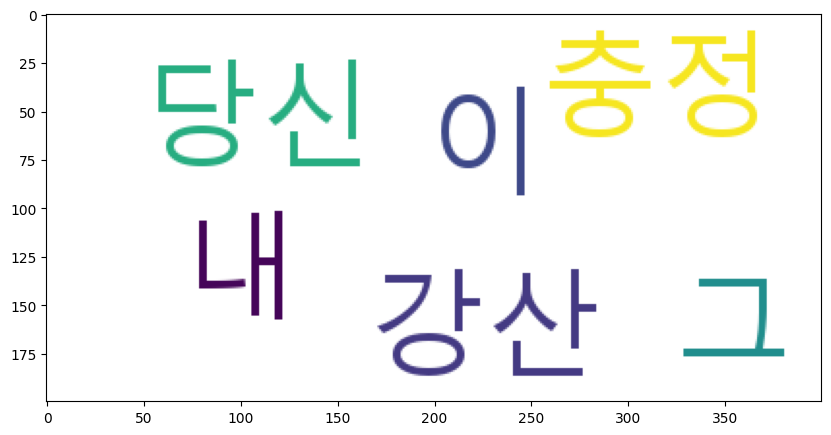

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import wordcloud

In [17]:
df = pd.read_table(r'C:\\sqlite\\mysql\\code\\수업\\Groupby\\data\\ratings_train.txt')
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [27]:
df['id'].nunique()

150000

In [28]:
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [31]:
df = df.dropna(how = 'any')# Null 값이 존재하는 행 제거
df.isnull().values.any()# Null 값이 존재하는지 확인
# 불용어 => 한글과 공백을 제외하고 모두 제거

False

In [32]:
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 정규표현식
# 모든한글을 정규표현식 [ㄱ-ㅎ|가-힣]

In [35]:
from konlpy.tag import Okt
okt = Okt()

temp_list=[]

for sentence in df['document']:
    s_list=okt.pos(sentence)
    for word,tag in s_list:
        if tag in ['Noun', 'Adjective']:
            temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('영화', 50737),
 ('정말', 9645),
 ('진짜', 8343),
 ('이', 8001),
 ('점', 7930),
 ('연기', 6434),
 ('평점', 6324),
 ('것', 6315),
 ('최고', 6035),
 ('스토리', 5344),
 ('생각', 5314),
 ('왜', 5157),
 ('드라마', 5063),
 ('감동', 4879),
 ('사람', 4836),
 ('보고', 4612),
 ('말', 4565),
 ('더', 4367),
 ('때', 4314),
 ('내', 4306),
 ('배우', 4297),
 ('거', 4139),
 ('감독', 4126),
 ('재미', 3930),
 ('내용', 3899),
 ('그냥', 3838),
 ('뭐', 3813),
 ('그', 3698),
 ('좀', 3665),
 ('이런', 3602),
 ('쓰레기', 3542),
 ('없는', 3492),
 ('시간', 3446),
 ('수', 3253),
 ('나', 3060),
 ('작품', 2964),
 ('사랑', 2943),
 ('없다', 2868),
 ('다시', 2838),
 ('하나', 2838),
 ('볼', 2790),
 ('마지막', 2755),
 ('이건', 2688),
 ('좋은', 2663),
 ('입니다', 2555),
 ('같은', 2549),
 ('완전', 2542),
 ('정도', 2523),
 ('있는', 2511),
 ('처음', 2452)]

In [ ]:
from wordcloud import WordCloud
#wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
wc=WordCloud(font_path='malgun',background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(cloud)